<a href="https://colab.research.google.com/github/TNLE01/MLA_TNL/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

## 2. Load the titanic dataset from seaborn

In [ ]:
#titanic = sns.load_dataset('titanic')
titanic = sns.load_dataset('titanic')

## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

<Axes: >

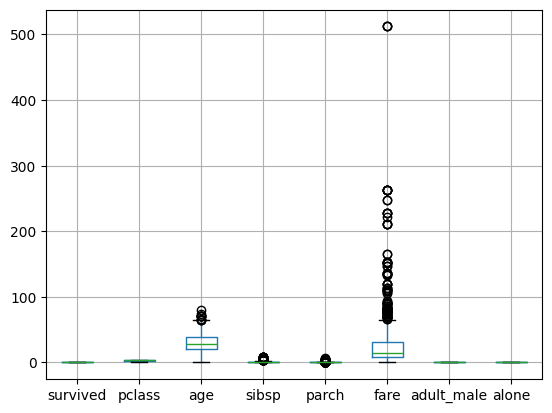

In [ ]:
titanic.boxplot()

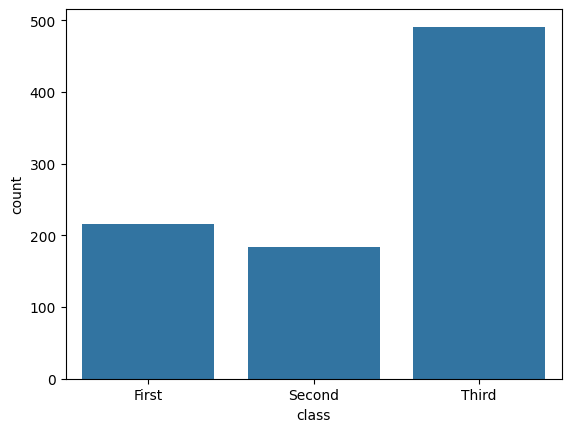

In [ ]:
sns.countplot(x='class', data=titanic)
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

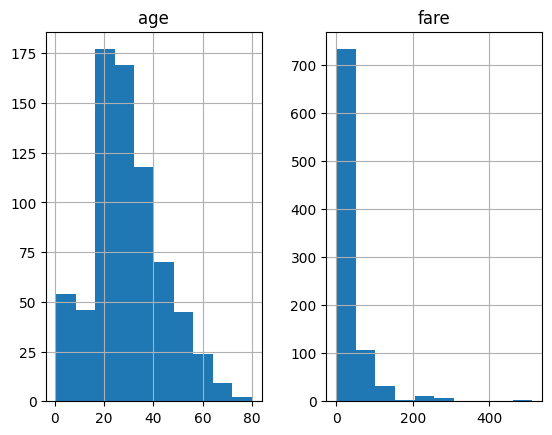

In [ ]:
titanic.hist(column=['age', 'fare'])

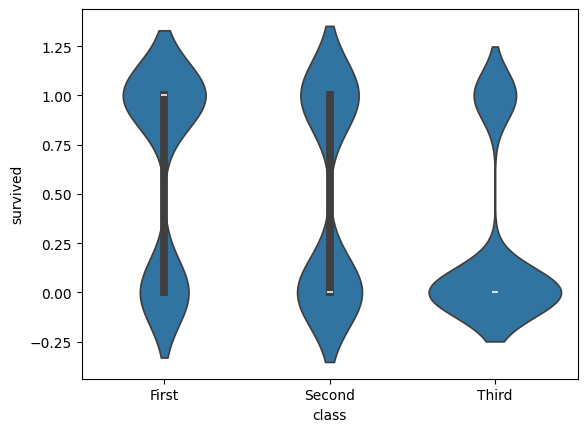

In [ ]:
sns.violinplot(x='class', y='survived', data=titanic)
plt.show()

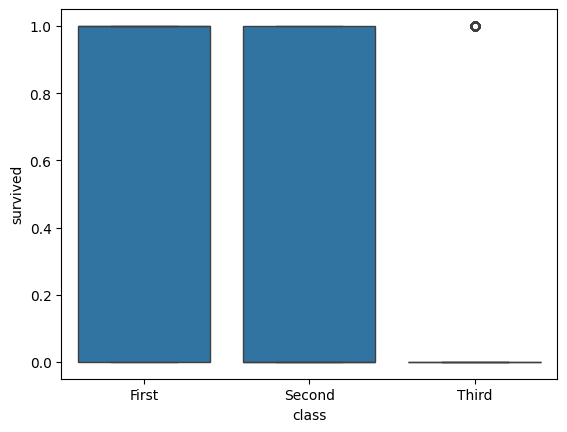

In [ ]:
sns.boxplot(x='class', y='survived', data=titanic)
plt.show()

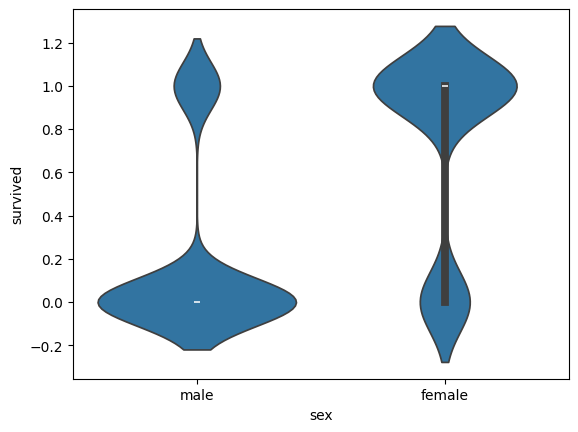

In [ ]:
sns.violinplot(x='sex', y='survived', data=titanic)
plt.show()

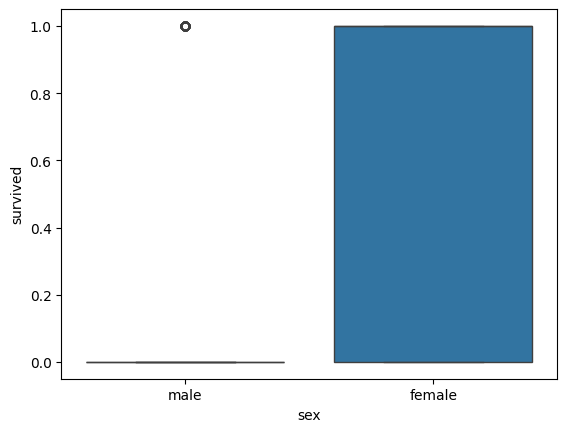

In [ ]:
sns.boxplot(x='sex', y='survived', data=titanic)
plt.show()

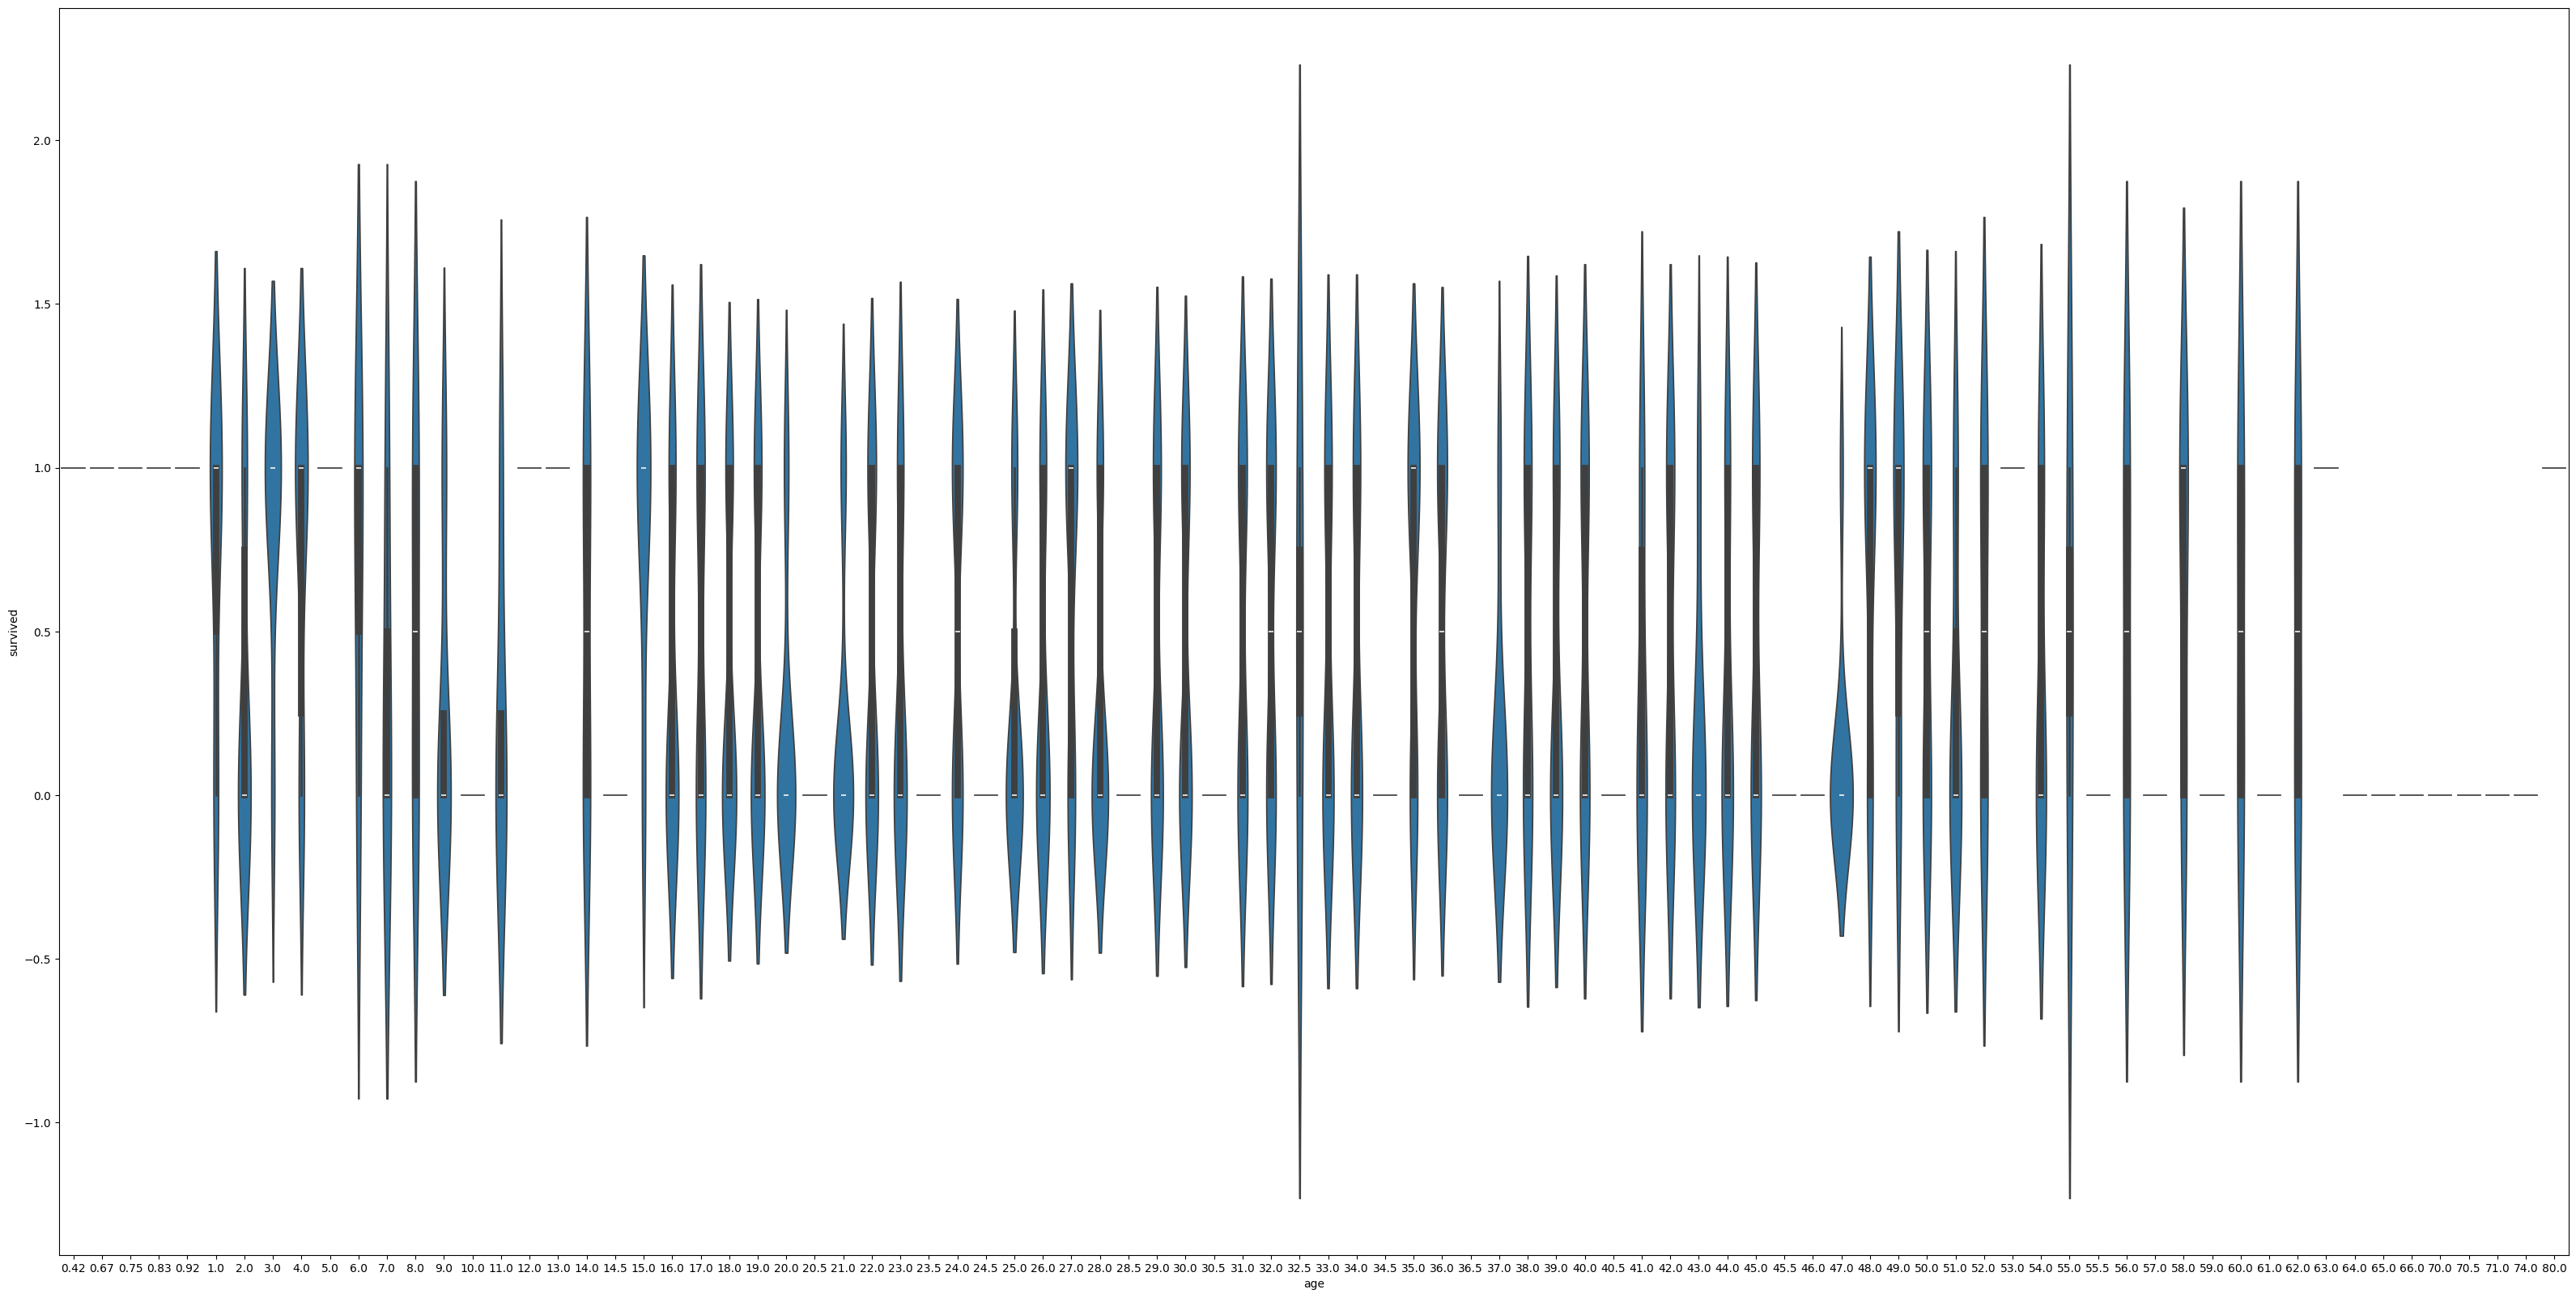

In [ ]:
plt.figure(figsize=(40, 20))
sns.violinplot(x='age', y='survived', data=titanic)
plt.show()

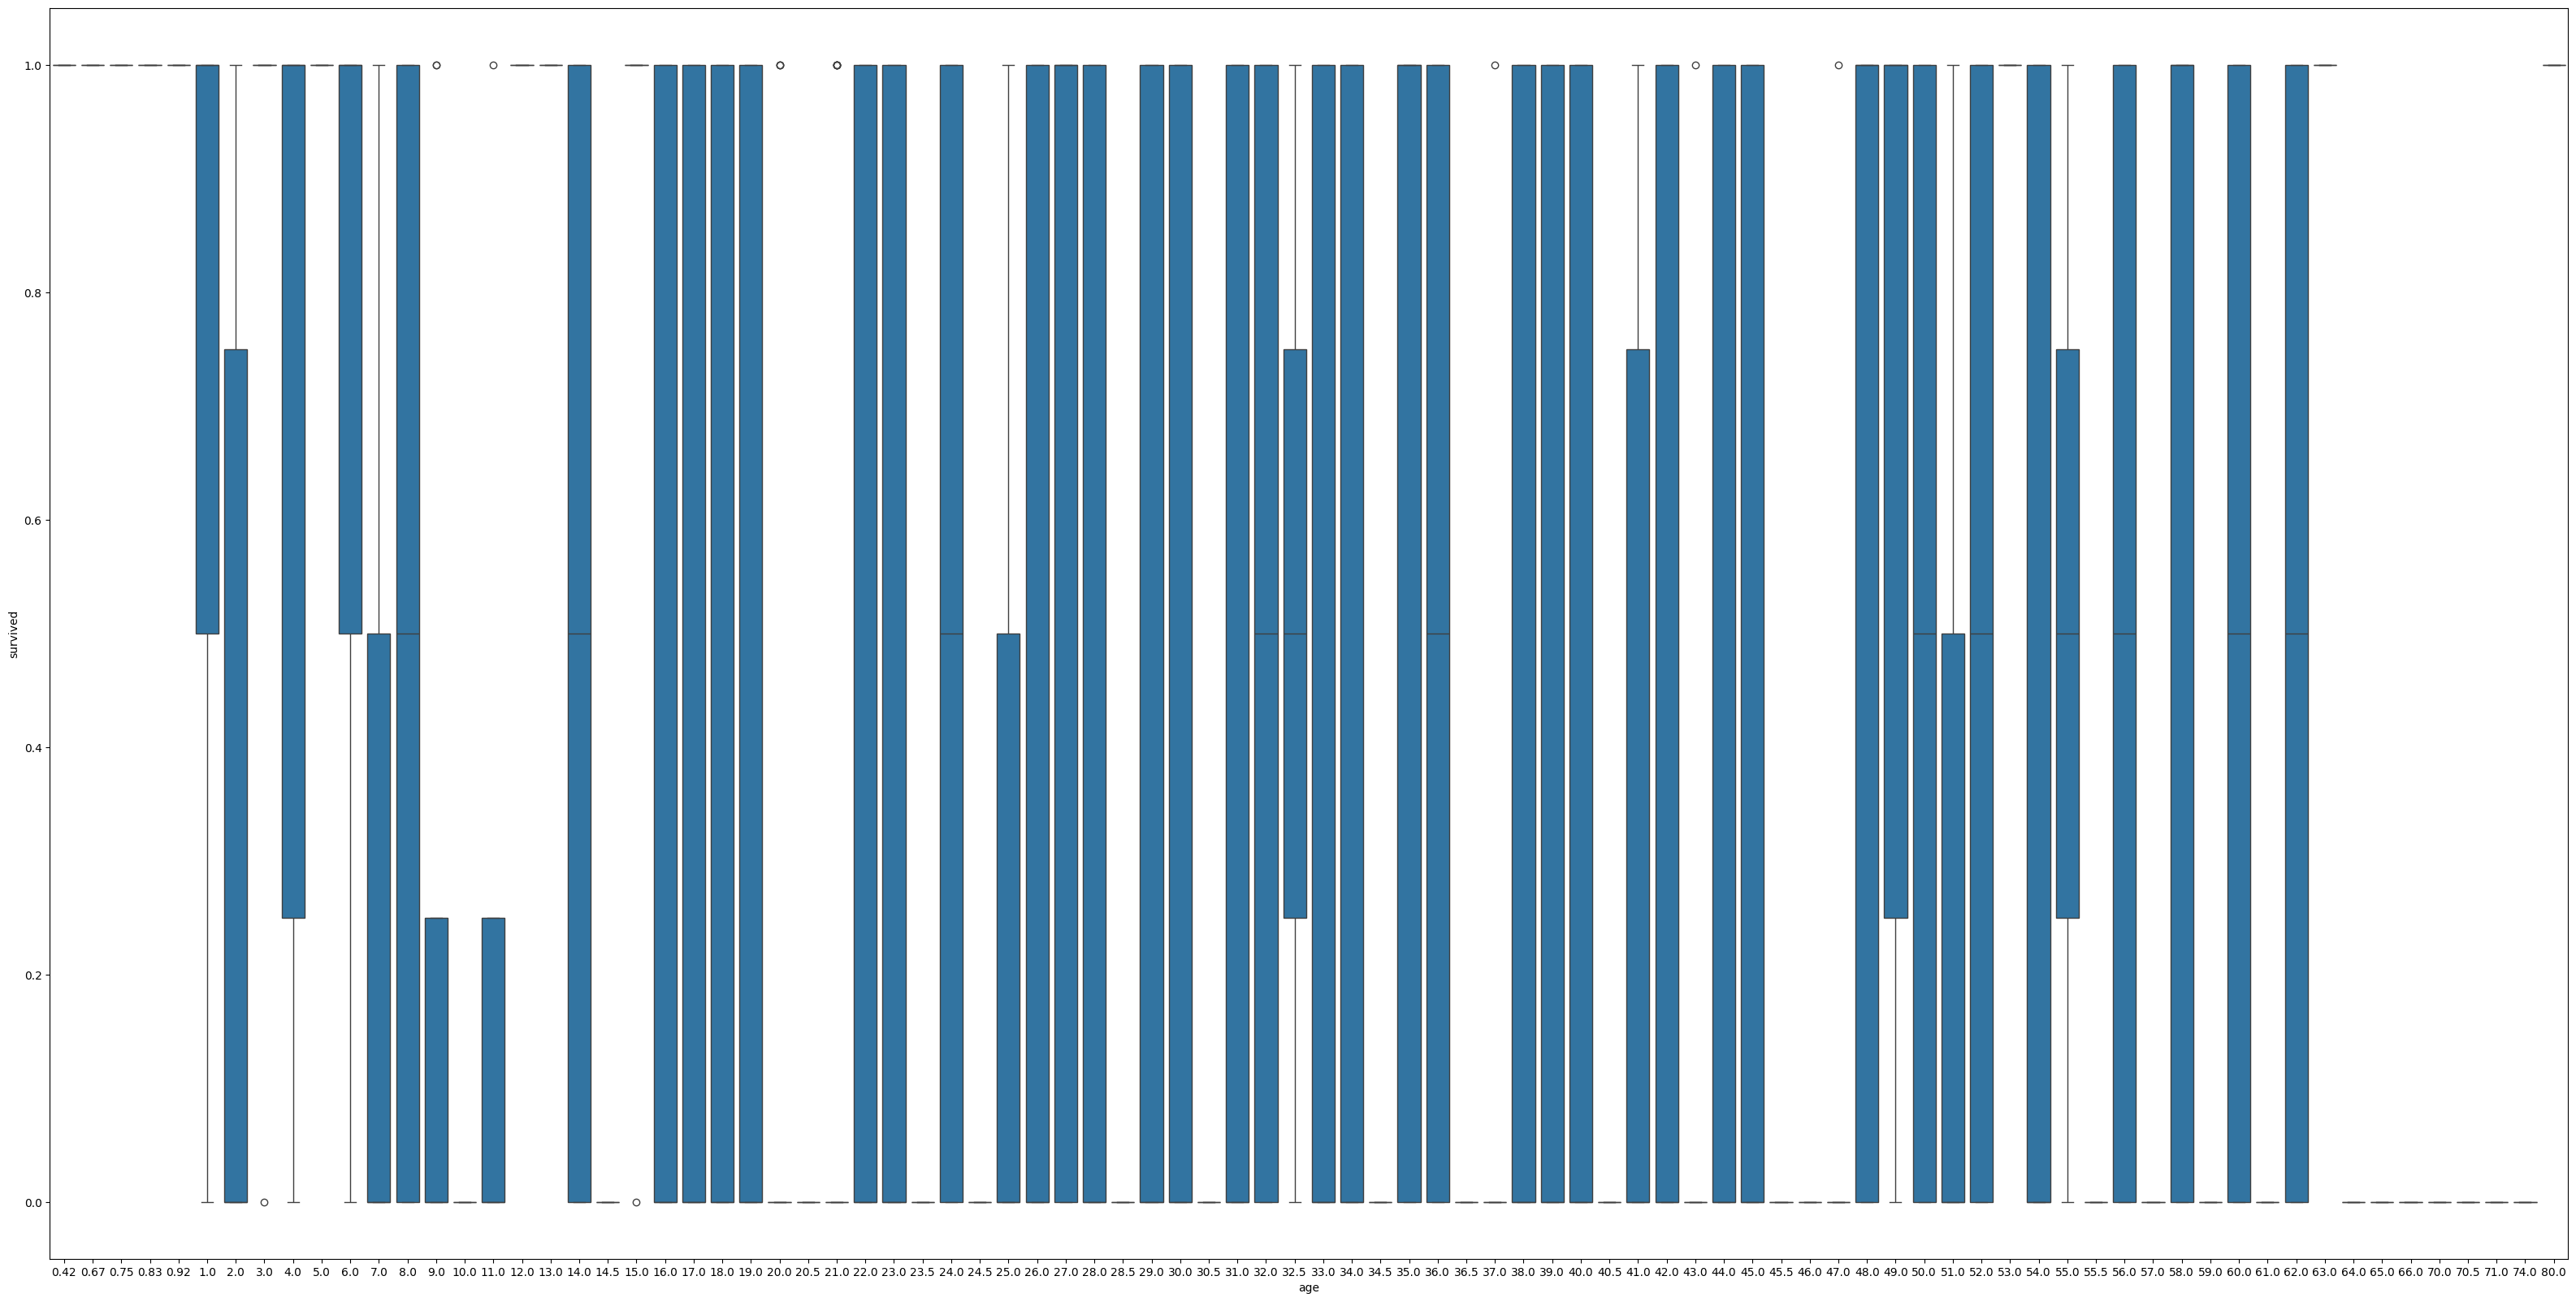

In [ ]:
plt.figure(figsize=(40, 20))
sns.boxplot(x='age', y='survived', data=titanic)
plt.show()

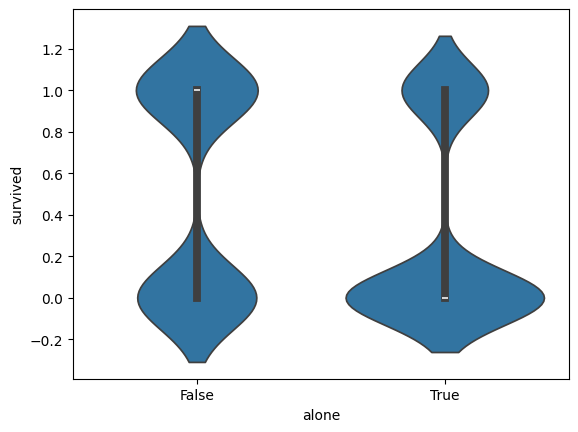

In [ ]:
sns.violinplot(x='alone', y='survived', data=titanic)
plt.show()

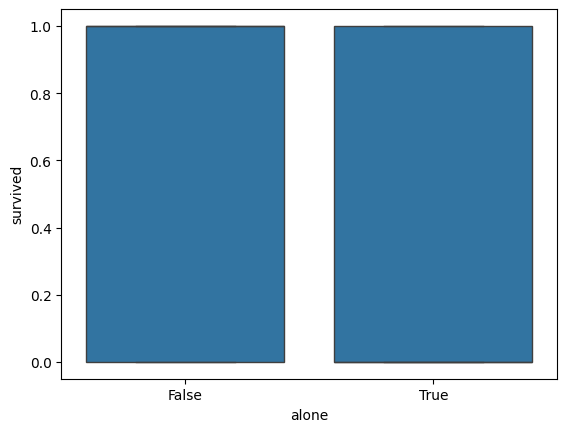

In [ ]:
sns.boxplot(x='alone', y='survived', data=titanic)
plt.show()

In [ ]:
# Split the data into features and target
#X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
#y = titanic['survived']
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
numeric_features = ['age', 'fare', 'pclass']
categorical_features = ['sex', 'embarked', 'who', 'alone']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training data with multiple models

In [ ]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.7821229050279329

Model: Random Forest
Accuracy: 0.8212290502793296

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8100558659217877

Model: Gradient Boosting
Accuracy: 0.8268156424581006


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
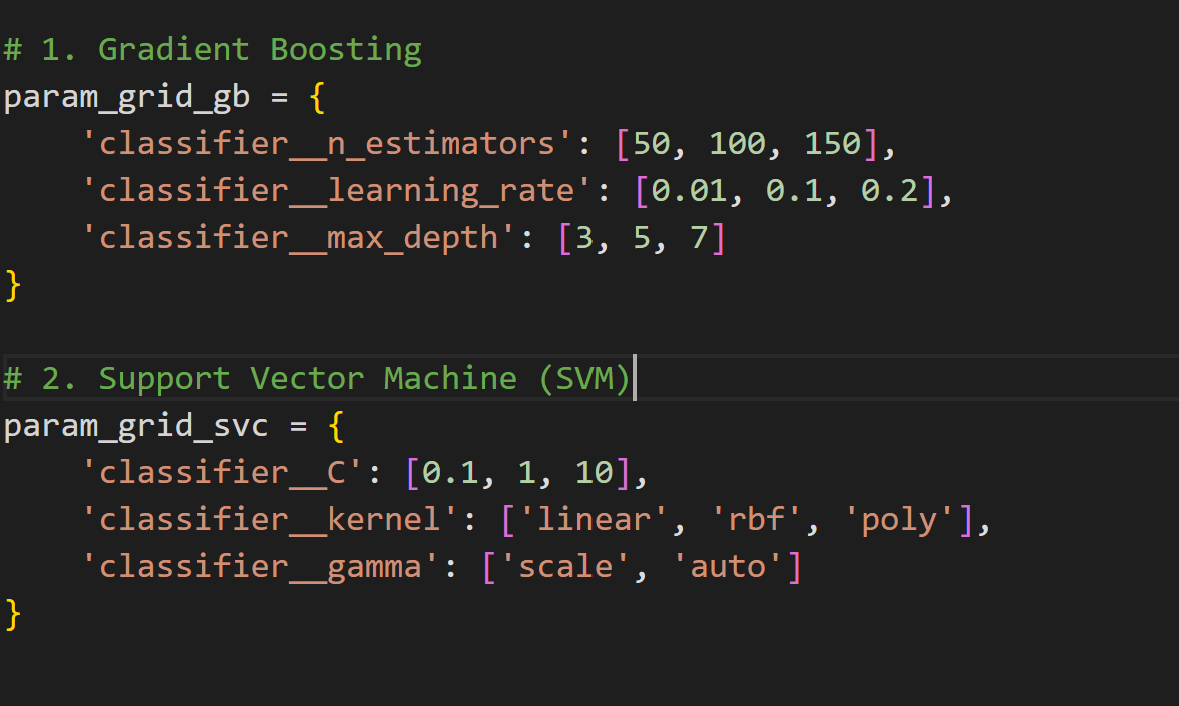

In [ ]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_depth': [3, 5, 7],
}

## List of models and their corresponding parameter grids
Example
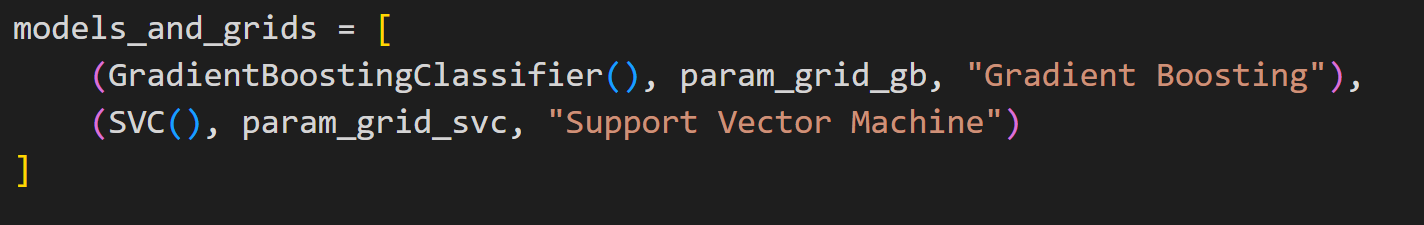

In [ ]:
models_and_grids = [
    (RandomForestClassifier(), param_grid_rf, "Random Forest"),
    (GradientBoostingClassifier(), param_grid_gb, "Gradient Boosting"),
]
from sklearn.model_selection import GridSearchCV

In [ ]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8230

Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.8314


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

1. Based on the accuracy scores, the highest model was Gradient Boosting, followed by Random Forest, followed by K-Nearest Neighbors, followed by Logistic Regression and Bagging Classifier, followed by Support Vector Machine, followed by Decision Tree as the lowest accuracy.

Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.7821229050279329

Model: Random Forest
Accuracy: 0.8212290502793296

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8100558659217877

Model: Gradient Boosting
Accuracy: 0.8268156424581006

2. The two best performing models were Gradient Boosting and Random Forest. Hyperparameter Tuning increases both of the top models accuracy by a bit.

3. The score for Gradient Boosting before was 0.8268156424581006, and 0.8314 after tuning, with a 0.0045843575419 increase. The score for Random Forest before was 0.8212290502793296, and 0.8230 after tuning, with a 0.00177094972067 increase. The model that showed the most improvement was Gradient Boosting.

4. The optimal parameters found during hyperparameter tuning for Gradient Boosting was classifier__learning_rate = 0.01,classifier__max_depth = 5, and classifier__n_estimators = 200. The optimal parameters found during hyperparameter tuning for Random Forest was classifier__max_depth = 10, classifier__min_samples_leaf = 2, classifier__min_samples_split = 10, and classifier__n_estimators = 100. For Gradient Boosting, it is different by +2 for max depth and +100 for n estimators. For Random Forest, it is different by +10 for max depth, +1 for min samples leaf, and +8 for min samples split.

5. The models did not experience overfitting as the accuracy score was still around the same area that being around 82%. The model I would pick for deployment would be Gradiant Boosting.

6. With Random Forest being less complex and would take a bit less time than Gradient boosing, I would pick Random Forest for deployment.